In [127]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance
import re

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, classification_report

from ingeniring_utils import * # import all existing functions from file cleaning.py
from modeling_utils import *

%load_ext autoreload
%autoreload 2


pd.set_option('display.max_columns', 360)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# Loading Data

df = pd.read_csv('data/df.csv')

In [67]:
df.columns

Index(['ticket_id', 'agency_name', 'disposition', 'discount_amount',
       'judgment_amount', 'compliance', 'lon', 'lat', 'parcel_id', 'AddCombo',
       'Structure', 'Use_', 'Condition', 'Occupancy', 'Needs_Boarding', 'Fire',
       'Dumping', 'Units', 'Improved', 'Maintained'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112169 entries, 0 to 112168
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        112169 non-null  int64  
 1   agency_name      112169 non-null  object 
 2   disposition      112169 non-null  object 
 3   discount_amount  112169 non-null  float64
 4   judgment_amount  112169 non-null  float64
 5   compliance       112169 non-null  float64
 6   lon              112169 non-null  float64
 7   lat              112169 non-null  float64
 8   parcel_id        112169 non-null  int64  
 9   AddCombo         112169 non-null  object 
 10  Structure        112169 non-null  object 
 11  Use_             112169 non-null  object 
 12  Condition        112169 non-null  object 
 13  Occupancy        112169 non-null  object 
 14  Needs_Boarding   112169 non-null  object 
 15  Fire             112169 non-null  object 
 16  Dumping          112169 non-null  obje

In [74]:
# define target variable and categorical features

target = df['compliance']

features = ['agency_name', 'disposition', 'discount_amount',
            'judgment_amount', 'Structure', 'Condition', 'Occupancy',
            'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Improved', 'Maintained', 'Use_']

numeric_features = ['discount_amount', 'judgment_amount']

cat_features = ['agency_name', 'disposition', 'Structure', 'Condition', 'Improved', 
                 'Occupancy', 'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Maintained', 'Use_']

In [75]:
numeric_var_analysis(df, numeric_features)

Continuous Variables
                    count        mean         std  min    25%    50%    75%  \
discount_amount  112169.0    0.159402    3.416555  0.0    0.0    0.0    0.0   
judgment_amount  112169.0  396.963152  707.933057  0.0  140.0  305.0  305.0   

                     max  
discount_amount    350.0  
judgment_amount  11030.0  


In [76]:
categor_var_analysis(df, cat_features)

Discrete Variables
agency_name
Buildings, Safety Engineering & Env Department    59417
Department of Public Works                        43441
Detroit Police Department                          3526
Health Department                                  5785
Name: agency_name, dtype: int64
--------------------------------------------------------------------------------
disposition
Responsible (Fine Waived) by Deter      131
Responsible by Admission              10096
Responsible by Default                95969
Responsible by Determination           5973
Name: disposition, dtype: int64
--------------------------------------------------------------------------------
Structure
no          4
yes    112165
Name: Structure, dtype: int64
--------------------------------------------------------------------------------
Condition
fair                  17784
good                  85003
poor                   6186
suggest demolition     3196
Name: Condition, dtype: int64
------------------------------

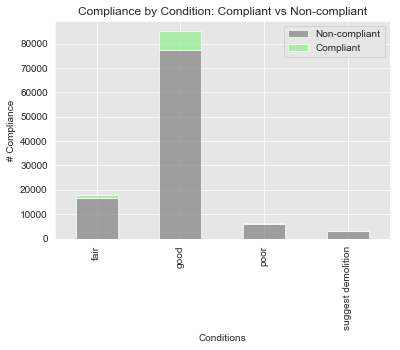

In [77]:
# Condition class visualization

condition = df.groupby(['Condition','compliance']).Condition.count().unstack()
p1 = condition.plot(kind = 'bar', stacked = True, 
                   title = 'Compliance by Condition: Compliant vs Non-compliant', 
                   color = ['grey','lightgreen'], alpha = .70)

p1.set_xlabel('Conditions')
p1.set_ylabel('# Compliance')
p1.legend(['Non-compliant','Compliant'])
plt.show()

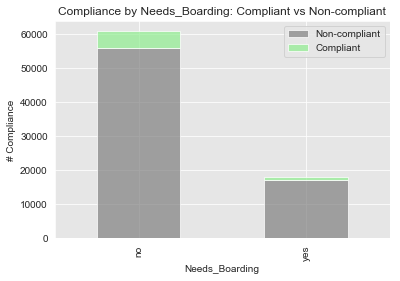

In [52]:
# Needs_Boarding class visualization

Needs_Boarding = df.groupby(['Needs_Boarding','compliance']).Needs_Boarding.count().unstack()
p1 = Needs_Boarding.plot(kind = 'bar', stacked = True, 
                   title = 'Compliance by Needs_Boarding: Compliant vs Non-compliant', 
                   color = ['grey','lightgreen'], alpha = .70)

p1.set_xlabel('Needs_Boarding')
p1.set_ylabel('# Compliance')
p1.legend(['Non-compliant','Compliant'])
plt.show()

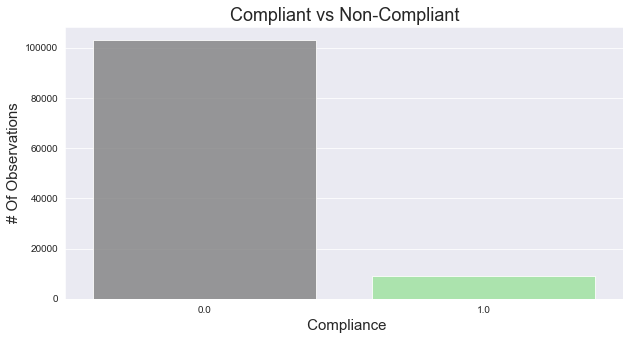

In [81]:
# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(target, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Compliant vs Non-Compliant', size = 18)
plt.ylabel('# Of Observations', size =15)
plt.xlabel(' Compliance', size =15)
plt.show()

In [92]:
#  Creating dummy variables for categorical variables wit function to_dummies.
X = to_dummies(df[features], cat_features)
y = target

## Create Model and Define Evaluation Metric for Project

-----

## Logistic Regression Model 

In [123]:
log_clf = log_reg(X, y)

Accuracy on Train Set:
0.9236145781328008

 Accuracy on Test Set: 
0.9269692971508041

 F1 Score for Test Set
0.1551155115511551

 Confusion Matrix for Test Set
[[25807    34]
 [ 2014   188]]

 Precision Score for Test Set
0.8468468468468469

 Recall Score for Test Set
0.08537693006357856


------------
## Logistic Regression Model WITH SMOTE

In [128]:
log_reg_smote(X, y)

Original class distribution
0.0    103058
1.0      9111
Name: compliance, dtype: int64

 Synthetic sample class distribution
1.0    103058
0.0    103058
Name: compliance, dtype: int64
Accuracy on Train Set:
0.7265617419317277

 Accuracy on Test Set: 
0.7244270216771138

 F1 Score for Test Set
0.6858407079646018

 Confusion Matrix for Test Set
[[21829  3862]
 [10338 15500]]

 Precision Score for Test Set
0.8005371345935337

 Recall Score for Test Set
0.5998916324792941


LogisticRegression(fit_intercept=False, solver='liblinear')

-----

## Decision Tree Model 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

# predictions
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Calculate Accuracy Score 
print('Accuracy on Train Set:')
print(metrics.accuracy_score(y_train, y_pred_train))

print('\n Accuracy on Test Set: ')
print(metrics.accuracy_score(y_test, y_pred_test))

print("\n F1 Score for Test Set")
print(metrics.f1_score(y_test, y_pred_test))

# IMPORTANT: first argument is true values, second argument is predicted values
print("\n Confusion Matrix for Test Set")
print(metrics.confusion_matrix(y_test, y_pred_test))

print( "\n Precision Score for Test Set")
print(metrics.precision_score(y_test, y_pred_test))

print("\n Recall Score for Test Set")
print(metrics.recall_score(y_test, y_pred_test))

Accuracy on Train Set:
0.9232277949005324

 Accuracy on Test Set: 
0.9275207274672372

 F1 Score for Test Set
0.13968253968253969

 Confusion Matrix for Test Set
[[31014    11]
 [ 2428   198]]

 Precision Score for Test Set
0.9473684210526315

 Recall Score for Test Set
0.0753998476770754


### Logistic Regression Model with SMOTE

LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.7923171864077873
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.7905096374014765
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.7902258208837062
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.7895770860170379
-------------------------------------------------------
LogisticRegression(C=0.8, fit_intercept=False, solver='liblinear')
AUC for 0.8: 0.7895670334404666
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.7900240022142672
-------------------------------------------------------
LogisticRegression(C=1.25, fit_intercept=False, solver='liblinear')
AU

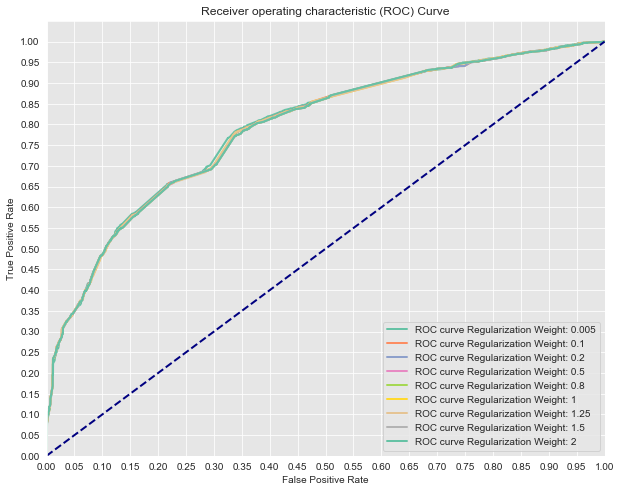

In [139]:
# Now let's compare a few different regularization performances on the dataset
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Descision Tree Model

Feature Importance: 



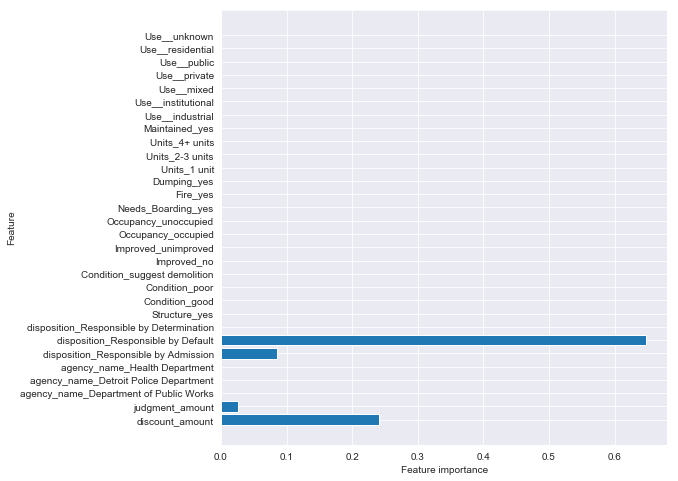

Confusion Matrix: 

[[25777    14]
 [ 2053   199]]

General Report 

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     25791
         1.0       0.93      0.09      0.16      2252

    accuracy                           0.93     28043
   macro avg       0.93      0.54      0.56     28043
weighted avg       0.93      0.93      0.90     28043

Testing Accuracy for Decision Tree Classifier: 92.63%


In [83]:
decision_tree(X, y, max_depth = 3)

----

### Descision Tree Model with SMOTE

Feature Importance: 



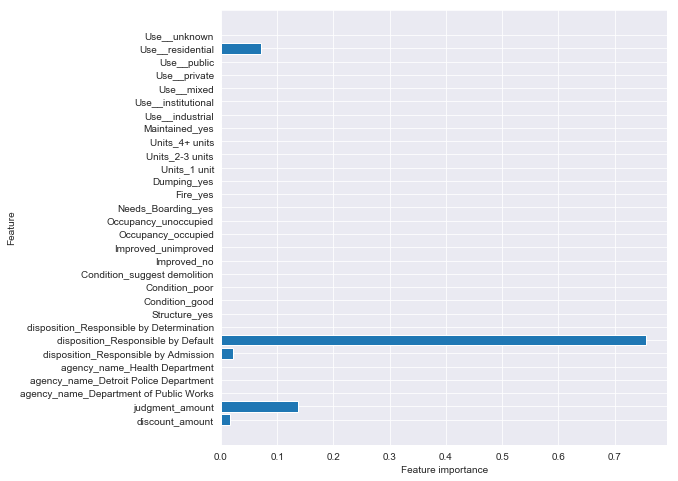

Confusion Matrix: 

[[21211  4580]
 [  830  1422]]

General Report 

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89     25791
         1.0       0.24      0.63      0.34      2252

    accuracy                           0.81     28043
   macro avg       0.60      0.73      0.62     28043
weighted avg       0.90      0.81      0.84     28043

Testing Accuracy for Decision Tree Classifier: 80.71%


In [86]:
clf = decision_tree_smote(X, y , max_depth=3)

## Usinng Cross Validation

In [90]:
from sklearn.metrics import precision_score


In [87]:
precision_score()

DecisionTreeClassifier(max_depth=3)

In [91]:
# plt.figure(figsize=(15,8))
# plt.bar(np.arange(len(clf.feature_importances_)), np.abs(np.log(clf.feature_importances_)))
# plt.xticks(np.arange(len(clf.feature_importances_)), X.columns, rotation='vertical')
# plt.show()